Cluster Labels:
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1 -1 -1  1 -1 -1  1 -1  1  1  1  1  1 -1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1 -1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1 -1 -1
  1  1 -1  1  1 -1  1  1  1 -1 -1 -1  1  1  1 -1 -1  1  1  1  1  1  1  1
  1  1  1  1 -1  1]

Number of clusters found (excluding noise): 2
Number of noise points: 35


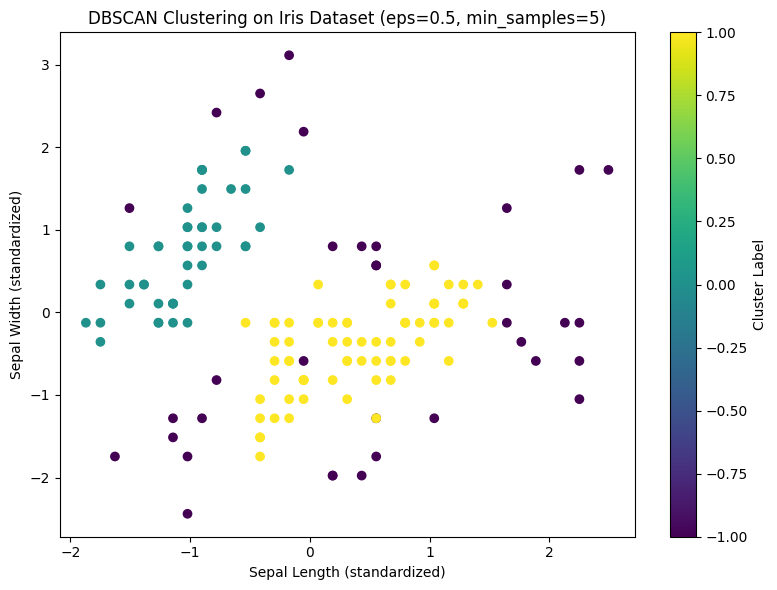

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# 1. Read the Iris dataset from CSV
df = pd.read_csv("Iris(in).csv")

# 2. Extract feature columns
X = df[['sepal_length', 'sepal_width',
        'petal_length', 'petal_width']]

# 3. Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
cluster_labels = dbscan.fit_predict(X_scaled)

# 5. Print cluster labels
print("Cluster Labels:")
print(cluster_labels)

# 6. Compute number of clusters (excluding noise)
unique_labels = set(cluster_labels)
num_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

# 7. Compute number of noise points
num_noise_points = list(cluster_labels).count(-1)

print("\nNumber of clusters found (excluding noise):", num_clusters)
print("Number of noise points:", num_noise_points)

# 8. Scatter plot using first two standardized features
plt.figure(figsize=(8, 6))
plt.scatter(
    X_scaled[:, 0],  # sepal_length (standardized)
    X_scaled[:, 1],  # sepal_width (standardized)
    c=cluster_labels,
    cmap='viridis'
)

plt.title("DBSCAN Clustering on Iris Dataset (eps=0.5, min_samples=5)")
plt.xlabel("Sepal Length (standardized)")
plt.ylabel("Sepal Width (standardized)")
plt.colorbar(label="Cluster Label")
plt.tight_layout()
plt.show()
